<a href="https://colab.research.google.com/github/azayverma/playground/blob/main/Bollinger_Bands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
import IPython
IPython.Application.instance().kernel.do_shutdown(True) #automatically restarts kernel after installations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


{'status': 'ok', 'restart': True}

[*********************100%***********************]  1 of 1 completed


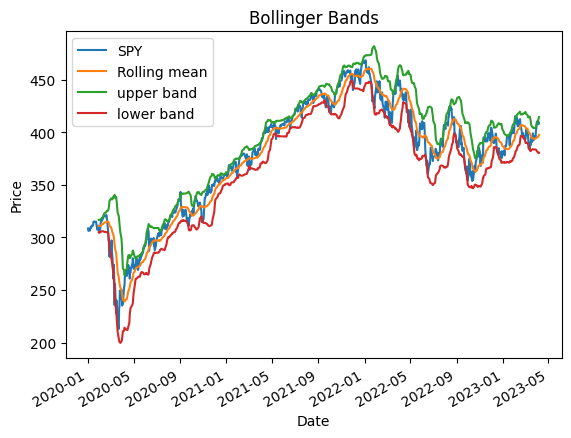

In [1]:
"""Bollinger Bands."""

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from Yahoo Finance."""
    df = pd.DataFrame(index=dates)
    start_date=dates[0]
    end_date=dates[-1]
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = yf.download(symbol, start_date,end_date)
        df_temp = df_temp[['Adj Close']]
        df_temp.index=df_temp.index.date
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return values.rolling(window=window,center=False).mean()


def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    return values.rolling(window=window,center=False).std()


def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    upper_band=rm+2*rstd
    lower_band=rm-2*rstd
    return upper_band, lower_band


def test_run():
    # Read data
    dates = pd.date_range('2020-01-01', datetime.today())
    symbols = ['SPY']
    df = get_data(symbols, dates)

    # Compute Bollinger Bands
    # 1. Compute rolling mean
    rm_SPY = get_rolling_mean(df['SPY'], window=20)

    # 2. Compute rolling standard deviation
    rstd_SPY = get_rolling_std(df['SPY'], window=20)

    # 3. Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    
    # Plot raw SPY values, rolling mean and Bollinger Bands
    ax = df['SPY'].plot(title="Bollinger Bands", label='SPY')
    rm_SPY.plot(label='Rolling mean', ax=ax)
    upper_band.plot(label='upper band', ax=ax)
    lower_band.plot(label='lower band', ax=ax)

    # Add axis labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    plt.rcParams["figure.figsize"] = (30,10)
    plt.show()


if __name__ == "__main__":
    test_run()
